In [36]:
%pip install autogluon.tabular

  Obtaining dependency information for autogluon.tabular from https://files.pythonhosted.org/packages/48/7c/50547d2940e98c8a15b8c92cd4953814385b95f5fc1dec806fa240389417/autogluon_tabular-1.5.0-py3-none-any.whl.metadata
  Using cached autogluon_tabular-1.5.0-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for scikit-learn<1.8.0,>=1.4.0 from https://files.pythonhosted.org/packages/c6/99/ed35197a158f1fdc2fe7c3680e9c70d0128f662e1fee4ed495f4b5e13db0/scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for networkx<4,>=3.0 from https://files.pythonhosted.org/packages/9e/c9/b2622292ea83fbb4ec318f5b9ab867d0a28ab43c5717bb85b0a5f6b3b0a4/networkx-3.6.1-py3-none-any.whl.metadata
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for autogluon.core==1.5.0 from https://files.pythonhosted.org/packages/96/de/4bffa0f6f3257

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ragha\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install autogluon

  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/5e/57/4c68e552ca5e91f8833b384f5633144b62af7a6d3363d9df0237ed735713/autogluon-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==1.5.0 from https://files.pythonhosted.org/packages/96/de/4bffa0f6f3257e73a22402019d19fbe34dfedc2865896f97ad57935cf7dd/autogluon_core-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==1.5.0 from https://files.pythonhosted.org/packages/f3/c8/46eb69e371da89337419d3c754140f3ddae3c85a81b061ba3f275f442475/autogluon_features-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==1.5.0 from https://files.pythonhosted.org/packages/48/7c/50547d2940e98c8a15b8c92cd4953814385b95f5fc1dec806fa240389417/autogluon_tabular-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.multimodal==1.5.0 from https://files.pythonhosted.org/packages/d

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ragha\\AppData\\Roaming\\Python\\Python312\\site-packages\\~sutil\\_psutil_windows.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/9f/c4/0ab22726a04ede56f689476b760f98f8f46607caecff993017ac1b64aa5d/scikit_learn-1.8.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/7b/91/984aca2ec129e2757d1e4e3c81c3fcda9d0f85b74670a094cc443d9ee949/joblib-1.5.3-py3-none-any.whl.metadata
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 991.0 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/8.0 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 10.3 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 16.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 16.0 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 15.5 M


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import numpy as np

In [38]:
#read firms
df_firms = pd.read_csv("synthetic_law_firm_level_pnc_auto_corrected.csv")

In [39]:
#reading litigation data
df_lit = pd.read_csv("lit_prop_2k_with_law_firm_assigned.csv")

In [40]:
df_firms.columns

Index(['Firm Name', 'Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time', 'L100', 'L200', 'L300',
       'L400', 'L500', 'Win rate proxy', 'Cost per case', 'Fee per unit'],
      dtype='object')

#Log-Transform

In [41]:
log_transform_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time',  'Cost per case']
for i in log_transform_cols:
    df_firms[i] = df_firms[i].apply(lambda x: np.log(x+1))

#Robust Scaler

In [42]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns for scaling
robust_scale_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time', 'Win rate proxy', 'Cost per case', 'Fee per unit']

# robust_scale_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
#        'Deduction expense', 'Billed units fee', 'Cycle time', 'Win rate proxy', 'Cost per case', 'Fee per unit']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_firms[robust_scale_cols])

display(X_scaled)

array([[-0.38439866,  0.53520105, -0.89672085, ..., -0.16479401,
        -1.23253331,  1.13455328],
       [ 0.76584287, -0.31014566,  0.51491403, ..., -0.47191011,
         0.93345073,  0.52314316],
       [ 0.52888979,  0.6464424 ,  0.62582671, ..., -0.26966292,
         0.04438989,  0.03659849],
       ...,
       [ 0.26439878, -1.13731176, -0.23991704, ..., -0.53932584,
         0.62480169, -0.55758881],
       [ 0.09813058,  0.2931676 , -0.35048016, ...,  0.3670412 ,
        -0.53886416,  1.10871905],
       [-0.19399682,  0.7030613 ,  0.29833494, ...,  0.59925094,
        -0.41329647, -0.69537137]], shape=(100, 13))

In [43]:
binary_cols = ['L100', 'L200', 'L300', 'L400', 'L500',]
X_binary = df_firms[binary_cols].values
X_final = np.hstack((X_scaled, X_binary))

#PCA

In [44]:
#robust scaler
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_final)
print(X_pca)

[[-1.50182740e+00 -3.40938012e+00 -1.89534849e-01  9.78849857e-01
   1.23530254e-01  2.10883261e-01 -6.99112416e-01]
 [ 2.08315693e+00  1.13230513e+00  3.54917502e-01  6.22478387e-01
   2.44537693e-01 -8.96711124e-01  1.86528058e-02]
 [ 1.82313102e+00 -2.42213278e-01  1.17600023e+00  9.70751466e-01
  -4.47568217e-01 -6.20110030e-02  2.28326906e-01]
 [-5.16847821e-01 -1.10329838e+00  2.45668487e-02  1.03656647e+00
  -1.39487035e+00  9.83635252e-01  3.51531070e-01]
 [ 7.88250922e-01  5.72061025e-01  7.94665191e-01 -7.67347437e-01
  -1.71732774e+00  1.13393046e+00 -9.11838203e-02]
 [ 3.73607828e-02 -4.01271882e-01 -3.70456216e-01  8.75238903e-01
  -7.23058252e-01 -7.72882109e-01  1.70352525e-01]
 [ 5.96968304e-01 -2.49044217e+00 -2.04608228e+00 -4.42092003e-01
   1.71209799e+00 -2.76227354e-01  8.22460662e-01]
 [ 1.11295829e+00 -6.52616546e-01  9.87467582e-01 -4.98385377e-01
   1.54398194e-01 -1.62344311e-01  5.44174621e-01]
 [-1.44519433e+00  8.44815373e-01  1.44074842e-01  1.00382284e+0

In [45]:
pca.explained_variance_ratio_

array([0.28465287, 0.19797377, 0.13737924, 0.06228288, 0.05730402,
       0.04455236, 0.03963376])

#PCA

In [46]:
# import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}
K = range(2, 9)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    silhouette_scores[k] = silhouette_score(X_pca, labels)
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]}")
 

Silhouette Score for k=2: 0.19031683068148678
Silhouette Score for k=3: 0.16717549487559755
Silhouette Score for k=4: 0.18524933938757981
Silhouette Score for k=5: 0.15262127178420765
Silhouette Score for k=6: 0.1666622841379934
Silhouette Score for k=7: 0.15237902599138095
Silhouette Score for k=8: 0.13930941542496136


In [47]:
#Choosing k=4 due to spike in silhouette score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_init=50, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

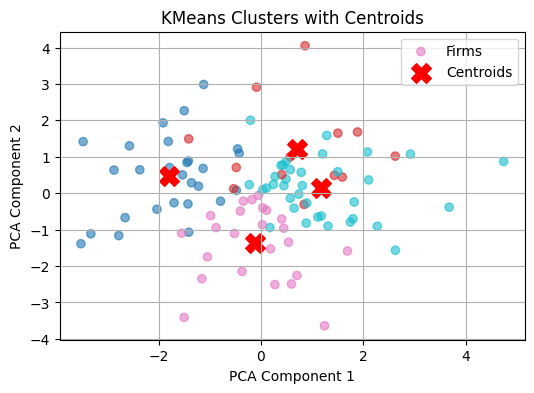

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the KMeans clusters and centroids
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='tab10', alpha=0.6, label='Firms')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
#pca with silhouette 
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, labels_km)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.18524933938757981


In [50]:
df_firms['cluster_kmeans'] = labels_km
cluster_profiles = df_firms.groupby('cluster_kmeans').agg(['count',list]).reset_index()
display(cluster_profiles)
firms_to_clusters = df_firms.groupby('Firm Name')['cluster_kmeans'].nunique()
overlapping_firms = firms_to_clusters[firms_to_clusters > 1].index.tolist()
print(overlapping_firms)

cluster_kmeans Firm Name                                                     \
                     count                                               list   
0              0        27  [Edwards & Parker, LLP, Jackson, Scott & Partn...   
1              1        13  [Turner, Phillips & Partners, Scott, Phillips ...   
2              2        24  [Phillips & Garcia, LLP, Turner, Thompson & Ca...   
3              3        36  [Carter, Davis & Partners, Campbell & Kennedy,...   

  Paid post appeal                                                     \
             count                                               list   
0               27  [12.843069650865578, 13.637702866335324, 12.06...   
1               13  [14.045121423047997, 13.490267363009847, 13.37...   
2               24  [12.551873555883693, 11.342038562618507, 14.30...   
3               36  [14.268370260061257, 13.914766977475871, 10.91...   

  Case closed count                                                     \
              count                                               list   
0                27  [4.442651256490317, 5.017279836814924, 4.89034...   
1                13  [2.772588722239781, 2.3978952727983707, 2.3978...   
2                24  [5.214935757608986, 4.6913478822291435, 4.1431...   
3                36  [4.430816798843313, 5.318119993844216, 4.85203...   

  Deduction fee                                                     \
          count                                               list   
0            27  [7.403140307940165, 8.417425893401559, 6.43787...   
1            13  [8.361656885385562, 7.50436402574255, 9.070329...   
2            24  [7.187180860224074, 8.177296698716322, 8.41280...   
3            36  [8.903826081229067, 9.038703529774981, 8.68161...   

  Deduction expense  ...  L400  \
              count  ... count   
0                27  ...    27   
1                13  ...    13   
2                24  ...    24   
3                36  ...    36   

                                                      L500  \
                                                list count   
0  [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    27   
1            [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]    13   
2  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...    24   
3  [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...    36   

                                                     Win rate proxy  \
                                                list          count   
0  [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...             27   
1            [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]             13   
2  [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...             24   
3  [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...             36   

                                                     Cost per case  \
                                                list         count   
0  [0.696, 0.719, 0.719, 0.841, 0.677, 0.876, 0.8...            27   
1  [0.792, 0.702, 0.697, 0.718, 0.898, 0.814, 0.6...            13   
2  [0.755, 0.877, 0.684, 0.819, 0.738, 0.701, 0.6...            24   
3  [0.714, 0.741, 0.889, 0.757, 0.691, 0.7, 0.687...            36   

                                                     Fee per unit  \
                                                list        count   
0  [5.939039033054211, 5.374027625782512, 4.86290...           27   
1  [8.240575020986183, 7.846676009916266, 8.42013...           13   
2  [4.628691381029437, 5.6049929154923515, 6.1946...           24   
3  [7.12311662735429, 6.099242139281413, 6.231583...           36   

                                                      
                                                list  
0  [13.7, 13.28, 10.03, 9.26, 11.85, 11.29, 11.44...  
1  [12.18, 10.12, 10.33, 10.27, 9.63, 9.86, 11.43...  
2  [13.89, 12.29, 9.66, 12.98, 9.36, 9.46, 10.49,...  
3  [12.47, 11.34, 9.01, 9.74, 13.23, 10.62, 10.21...  

[4 rows x 39 columns]

[]


In [51]:
df_firms.rename(columns={'cluster_kmeans':'Cluster'}, inplace=True)

In [52]:
#Check for good segmentation/ directional separation
profile = df_firms.groupby('Cluster').agg({'Paid post appeal': 'median', 'Case closed count': 'median', 'Cycle time': 'median', 'Win rate proxy': 'median', 'Cost per case': 'median', 'Fee per unit': 'median'})
profile

,Paid post appeal,Case closed count,Cycle time,Win rate proxy,Cost per case,Fee per unit
Cluster,,,,,,
0,12.963908,4.744932,7.680730,0.7880,5.540400,11.440
1,13.490267,2.890372,7.412812,0.7260,7.846676,10.330
2,12.897522,4.465842,7.294047,0.7900,5.939971,11.715
3,13.548036,5.075154,7.453824,0.7575,6.083591,11.025


In [53]:
cluster_name_map = {0: 'High-Value Core Firms', #high fees, good win rate, balanced cost
                    1: 'High-Cost/ Underperformers', #gigh cost per case, weaker outcomes
                    2: 'Outcome Specialists', #strong win rate, moderate volumne
                    3: 'Efficient Volume Handlers' #high win rate, low cost, fast cycle
} 
df_firms['Cluster_name'] = df_firms['Cluster'].map(cluster_name_map)

#Create Radar charts

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
profile_scaled = scaler.fit_transform(profile)
profile_scaled = pd.DataFrame(profile_scaled, index=profile.index, columns=profile.columns)

#Invert Cost per case and Cycle time
profile_scaled['Cost per case'] = 1 - profile_scaled['Cost per case']
profile_scaled['Cycle time'] = 1 - profile_scaled['Cycle time']

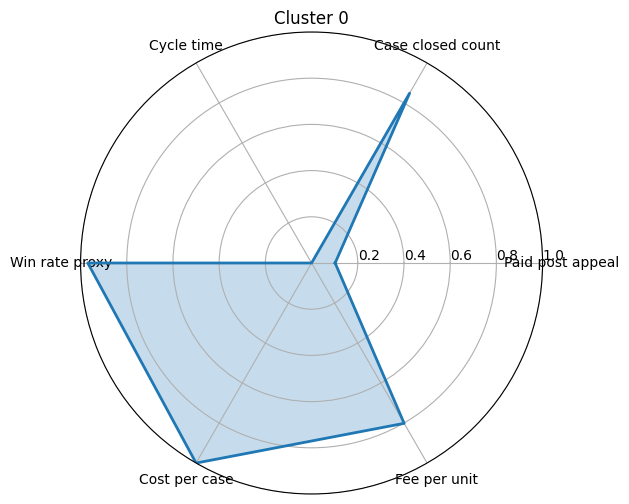

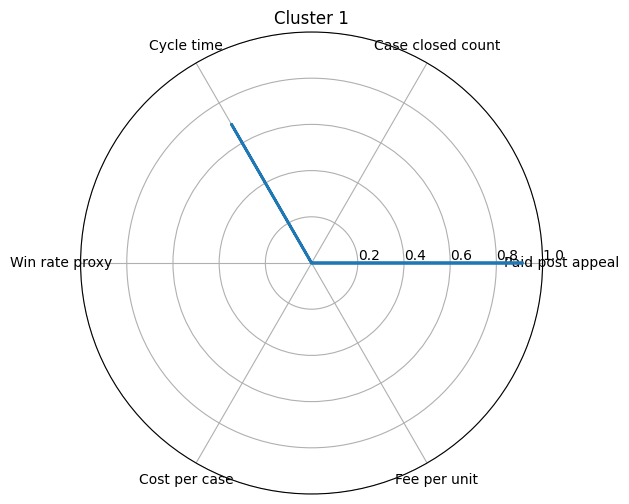

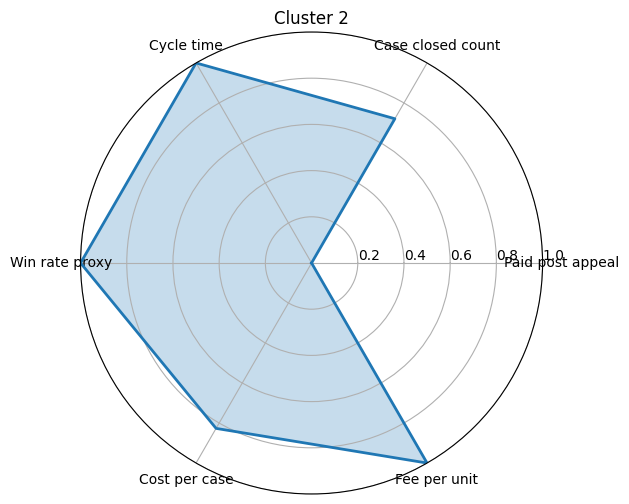

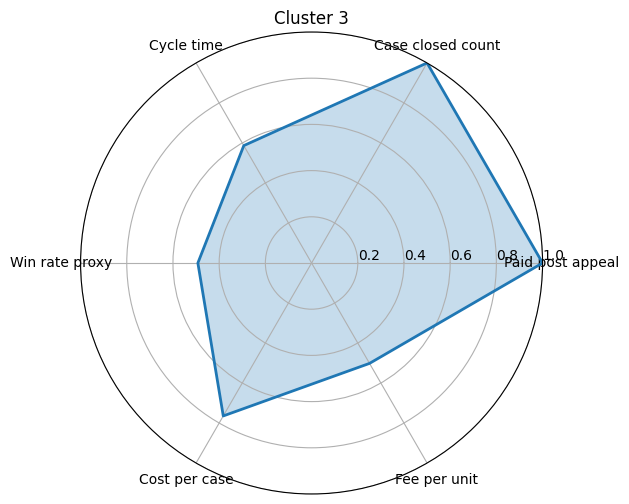

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def radar_chart(row, title):
    labels = row.index.tolist()
    values = row.values.tolist()
    values+=values[:1]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title)
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 1)
    plt.show()
for cluster_id in profile_scaled.index:
    radar_chart(profile_scaled.loc[cluster_id], f'Cluster {cluster_id}')

#Saving clustering output

In [56]:
df_firms.to_csv("synthetic_litigation_dataset_with_firms_and_cluster.csv", index=False)

#Multi-class ML model

#Reading clustering output

In [57]:
df_firms = pd.read_csv("synthetic_litigation_dataset_with_firms_and_cluster.csv")

#Reading litigation v2 dataset

In [58]:
#reading litigation data
# df_lit = pd.read_csv("/dbfs/FileStore/IP_development/Litigation_Propensity/synthetic_litigation_dataset_with_claims_andFirms.csv")

In [59]:
df_lit.columns

Index(['CLM_NBR', 'SUB_DTL_DESC', 'DEMAND', 'OFFER', 'COUNTER', 'MAJ_PERL_CD',
       'FTR_JRSDTN_ST_ABBR', 'VEH_REGISTERED_STATE', 'ACDNT_CITY',
       'POLICE_RPT_FILE_IND', 'BODY_PART_INJD_DESC', 'INSRD_FAULT_PCTG',
       'ATTY_REPRSNT_IND', 'ATTY_REPRSNT_IND_CLMNT', 'DRV_ATT_REP_IND',
       'HOSPTL_TRTMT_RECV_IND', 'DRVR_MEDCLLY_IMPAIRED_IND', 'COL_CD',
       'FTR_SIU_STATUS_DESC', 'CLMNT_GENDR_TYPE_CD', 'LOSS_PARTY',
       'AIA_POSTNS_5_AND_6_CD', 'AIA_POSTNS_3_AND_4_CD',
       'AIA_POSTNS_1_AND_2_CD', 'TOTAL_LOSS_IND', 'VEH_USAGE_CODE',
       'LOSS_DESC', 'INSRD_CONSENT_TO_SETL_IND', 'WEATHER_CONDTNS_CD',
       'ALL_VEH_DRVBL_IND', 'DOCTOR_TRTMT_RECV_IND', 'CLMNT_LOST_WAGES_IND',
       'CAUSE_OF_LOSS', 'EMPLYMT_STATUS_CD', 'ACDNT_WITNS_IND',
       'NBR_OF_VEHS_INVLD_IN_ACDNT', 'Claim_Notes', 'Law Firm Name'],
      dtype='object')

In [60]:
merged_df = df_lit.merge(df_firms[['Firm Name', 'Cluster']], right_on='Firm Name', left_on='Law Firm Name', how='left')
display(merged_df)

,CLM_NBR,SUB_DTL_DESC,DEMAND,OFFER,COUNTER,MAJ_PERL_CD,FTR_JRSDTN_ST_ABBR,VEH_REGISTERED_STATE,ACDNT_CITY,POLICE_RPT_FILE_IND,...,DOCTOR_TRTMT_RECV_IND,CLMNT_LOST_WAGES_IND,CAUSE_OF_LOSS,EMPLYMT_STATUS_CD,ACDNT_WITNS_IND,NBR_OF_VEHS_INVLD_IN_ACDNT,Claim_Notes,Law Firm Name,Firm Name,Cluster
0,5330467,Personal Auto BI,0.00,0.0,0.0,101,NY,NaN,Roseville,N,...,NaN,U,NaN,NaN,NaN,3,Case management notes finalized for this week....,Walker Henderson Law Group,Walker Henderson Law Group,3
1,6746999,Personal Auto BI,0.00,0.0,0.0,116,IL,Massachusetts,NaN,N,...,NaN,U,NaN,NaN,NaN,1,Pending supervisor review for next steps. Medi...,Jackson Parker Law Group,Jackson Parker Law Group,0
2,8496751,Commercial Auto BI,0.00,0.0,0.0,101,NJ,NY,NaN,NaN,...,NaN,U,NaN,NaN,NaN,2,Further details requested from claimant for cl...,"Walker & Associates, LLP","Walker & Associates, LLP",3
3,8107274,Personal Auto BI,0.00,0.0,0.0,101,LA,MI,NaN,N,...,NaN,U,NaN,NaN,N,3,Case management notes finalized for this week....,"Henderson, Foster & Baker, P.C.","Henderson, Foster & Baker, P.C.",0
4,3109986,Personal Auto BI,0.00,0.0,0.0,116,NaN,MI,NaN,N,...,NaN,U,NaN,NaN,N,1,Claim timeline updated in the internal system....,"Thompson, Henderson & Roberts, P.C.","Thompson, Henderson & Roberts, P.C.",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,4736604,Commercial Auto BI,0.00,0.0,0.0,115,NaN,MI,Hartford,NaN,...,NaN,U,NaN,NaN,NaN,1,Correspondence sent to third-party administrat...,"Edwards & Parker, LLP","Edwards & Parker, LLP",0
1951,5666336,Personal Auto BI,684512.49,0.0,0.0,100,GA,NaN,westland,NaN,...,NaN,U,NaN,NaN,NaN,1,Pending supervisor review for next steps. Disp...,"Murphy & Williams, LLP","Murphy & Williams, LLP",2
1952,939411,Personal Auto BI,0.00,0.0,0.0,101,MI,ohio,NaN,N,...,NaN,U,NaN,NaN,N,1,Further details requested from claimant for cl...,"Henderson, Foster & Baker, P.C.","Henderson, Foster & Baker, P.C.",0
1953,2701802,Personal Auto BI,0.00,0.0,0.0,101,CT,Conneticut,NaN,N,...,NaN,U,NaN,NaN,Y,1,Policy coverage confirmation completed. Court ...,"Walker & Associates, LLP","Walker & Associates, LLP",3


In [61]:
merged_df['Cluster'].value_counts(normalize=True,dropna=False)

Cluster
3    0.505371
0    0.269054
2    0.196419
1    0.029156
Name: proportion, dtype: float64

In [63]:
#train test split
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

train_df, test_df = train_test_split(merged_df,test_size=0.25,stratify =merged_df['Cluster'],random_state=42)
print(train_df.shape,test_df.shape)

ModuleNotFoundError: No module named 'autogluon'

In [0]:
print(train_df['Cluster'].value_counts(normalize=True,dropna=False),test_df['Cluster'].value_counts(normalize=True,dropna=False))

3    0.505457
0    0.268759
2    0.196453
1    0.029332
Name: Cluster, dtype: float64 3    0.505112
0    0.269939
2    0.196319
1    0.028630
Name: Cluster, dtype: float64


In [0]:
#features selection
from autogluon.tabular import TabularPredictor, FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_df)
print(feature_metadata)

('float', [])        :  4 | ['DEMAND', 'OFFER', 'COUNTER', 'INSRD_FAULT_PCTG']
('int', [])          :  3 | ['MAJ_PERL_CD', 'NBR_OF_VEHS_INVLD_IN_ACDNT', 'Cluster']
('object', [])       : 29 | ['SUB_DTL_DESC', 'FTR_JRSDTN_ST_ABBR', 'VEH_REGISTERED_STATE', 'ACDNT_CITY', 'POLICE_RPT_FILE_IND', ...]
('object', ['text']) :  3 | ['Claim_Notes', 'Law Firm Name', 'Firm Name']


In [0]:
#Iteration-1 (OG)
train_df = train_df.drop(columns=['VEH_REGISTERED_STATE','ACDNT_CITY'])
test_df = test_df.drop(columns=['VEH_REGISTERED_STATE','ACDNT_CITY'])

# #Iteration-2 and 3 (Drop features with importance <=0 and p_value >0.05)
# train_df = train_df.drop(columns=cols_to_drop)
# test_df = test_df.drop(columns=cols_to_drop)

In [0]:
from sklearn.metrics import f1_score
from autogluon.core.metrics import make_scorer
from sklearn.metrics._classification import f1_score
f1_scorer = make_scorer(name='f1',score_func=f1_score, optimum=1,greater_is_better=True, average='weighted',needs_proba=False, needs_threshold=False)

In [0]:
hyperparameters={'GBM':{},'XGB':{}}

In [0]:
predictor = TabularPredictor(label='Cluster',eval_metric=f1_scorer,problem_type='multiclass').fit(train_df.drop(columns=['Law Firm Name','Firm Name']),hyperparameters=hyperparameters,presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20260126_064848"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.3
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #100-Ubuntu SMP Tue May 27 21:41:06 UTC 2025
CPU Count:          16
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       38.71 GB / 57.39 GB (67.4%)
Disk Space Avail:   10.00 GB / 10.00 GB (100.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Workspace/Shared/AutogluonModels/ag-20260126_064848"
Train Data Rows:    1466
Train Data Columns: 24
Label Column:       Cluster
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoML

In [0]:
models = predictor.model_names()
model_name=[]
recall=[]
precision=[]
f1=[]
accuracy=[]
for model in models:
    result = predictor.evaluate(test_df, model=model)
    model_name.append(model)
    #recall.append(result['recall'])
    #precision.append(result['precision'])
    f1.append(result['f1'])
    #accuracy.append(result['accuracy'])

result_dict = {'model_name':model_name,  'f1':f1}
df_result = pd.DataFrame(result_dict)
df_result

,model_name,f1
0,LightGBM,0.436854
1,XGBoost,0.396980
2,WeightedEnsemble_L2,0.396980


In [0]:
test_data = test_df.copy()
test_data['predicted_cluster'] = predictor.predict(test_data.drop(columns=['Law Firm Name','Firm Name']))
test_data['proba'] = predictor.predict_proba(test_data).max(axis=1)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = test_df['Cluster']
y_pred = test_data['predicted_cluster']

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Accuracy:")
print(accuracy_score(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.17      0.23       132
           1       0.00      0.00      0.00        14
           2       0.18      0.08      0.11        96
           3       0.51      0.78      0.62       247

    accuracy                           0.46       489
   macro avg       0.26      0.26      0.24       489
weighted avg       0.39      0.46      0.40       489

Confusion Matrix:
[[ 23   0  13  96]
 [  1   0   2  11]
 [ 11   0   8  77]
 [ 33   0  21 193]]
Accuracy:
0.45807770961145194


/local_disk0/.ephemeral_nfs/envs/pythonEnv-0b2a607d-a2fd-402b-81fc-4ca8828e3aa7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-0b2a607d-a2fd-402b-81fc-4ca8828e3aa7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-0b2a607d-a2fd-402b-81fc-4ca8828e3aa7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

In [0]:
test_data['predicted_cluster'].value_counts(normalize=True)

3    0.770961
0    0.139059
2    0.089980
Name: predicted_cluster, dtype: float64

In [0]:
#Feature importance on Test data
fi = predictor.feature_importance(
    data=test_df,              
    num_shuffle_sets=10, model='LightGBM')
fi = pd.DataFrame(fi)
fi

These features in provided data are not utilized by the predictor and will be ignored: ['Law Firm Name', 'Firm Name']
Computing feature importance via permutation shuffling for 24 features using 489 rows with 10 shuffle sets...
	49.11s	= Expected runtime (4.91s per shuffle set)
	17.32s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Claim_Notes,0.052925,0.016328,1.456219e-06,10,0.069706,0.036145
FTR_JRSDTN_ST_ABBR,0.032591,0.007688,1.491312e-07,10,0.040492,0.024690
BODY_PART_INJD_DESC,0.023078,0.010783,4.099538e-05,10,0.034160,0.011996
INSRD_FAULT_PCTG,0.021592,0.003814,1.202768e-08,10,0.025512,0.017673
ACDNT_WITNS_IND,0.016486,0.003005,1.584073e-08,10,0.019574,0.013398
ATTY_REPRSNT_IND,0.014827,0.007037,4.616370e-05,10,0.022058,0.007595
ALL_VEH_DRVBL_IND,0.014818,0.004635,1.633839e-06,10,0.019582,0.010055
CLMNT_GENDR_TYPE_CD,0.012119,0.005985,6.237032e-05,10,0.018269,0.005969
COL_CD,0.011275,0.004934,2.468086e-05,10,0.016346,0.006205
WEATHER_CONDTNS_CD,0.010542,0.003267,1.511404e-06,10,0.013900,0.007185


In [0]:
fi_clean = fi.reset_index()
fi_clean = fi_clean.rename(columns={'index': 'Feature'})
fi_clean

,Feature,importance,stddev,p_value,n,p99_high,p99_low
0,Claim_Notes,0.052925,0.016328,1.456219e-06,10,0.069706,0.036145
1,FTR_JRSDTN_ST_ABBR,0.032591,0.007688,1.491312e-07,10,0.040492,0.024690
2,BODY_PART_INJD_DESC,0.023078,0.010783,4.099538e-05,10,0.034160,0.011996
3,INSRD_FAULT_PCTG,0.021592,0.003814,1.202768e-08,10,0.025512,0.017673
4,ACDNT_WITNS_IND,0.016486,0.003005,1.584073e-08,10,0.019574,0.013398
5,ATTY_REPRSNT_IND,0.014827,0.007037,4.616370e-05,10,0.022058,0.007595
6,ALL_VEH_DRVBL_IND,0.014818,0.004635,1.633839e-06,10,0.019582,0.010055
7,CLMNT_GENDR_TYPE_CD,0.012119,0.005985,6.237032e-05,10,0.018269,0.005969
8,COL_CD,0.011275,0.004934,2.468086e-05,10,0.016346,0.006205
9,WEATHER_CONDTNS_CD,0.010542,0.003267,1.511404e-06,10,0.013900,0.007185


In [0]:
cols_to_drop = fi_clean.loc[(fi_clean['importance']<=0) & (fi_clean['p_value'] > 0.05)]['Feature'].tolist()
cols_to_drop

['DOCTOR_TRTMT_RECV_IND', 'COUNTER', 'DRVR_MEDCLLY_IMPAIRED_IND']

In [0]:
display(cluster_profiles)

list_1,list_2,list_3,list_4,list_5,list_6,list_7,list_8,list_9,list_10,list_11,list_12,list_13,list_14,list_15,list_16,list_17,list_18,list_19,list_20,list_21,list_22,list_23,list_24,list_25,list_26,list_27,list_28,list_29,list_30,list_31,list_32,list_33
0,91,"List(Phillips & Garcia, LLP, Carter, Davis & Partners, Campbell & Kennedy, LLP, Turner, Thompson & Carter, P.C., Collins, Turner & Partners, Edwards, Lewis & Partners, Taylor & Campbell, LLP, Foster, Nelson & Thompson, P.C., Edwards & Parker, LLP, Jackson, Scott & Partners, Carter & Associates, LLP, Turner, Phillips & Partners, White, Scott & Parker, P.C., Hughes, Martin & Partners, Parker & Associates, LLP, Nelson, Carter & Partners, Thompson, Henderson & Roberts, P.C., Young & Thompson, LLP, Phillips, Roberts & Partners, Young & White, LLP, Murphy & Williams, LLP, Sanchez Baker Law Group, Henderson & Edwards, LLP, Kennedy, Nelson & Foster, P.C., Taylor, Young & Collins, P.C., Walker, Taylor & Murphy, P.C., Turner Murphy Law Group, Stevens & Lewis, LLP, Hughes, Garcia & Lewis, P.C., Anderson Young Law Group, Nelson & Associates, LLP, Taylor & Associates, LLP, Campbell, Jackson & Carter, P.C., Walker Henderson Law Group, Campbell, Davis & Partners, Garcia, Davis & Partners, Baker, Carter & Partners, Stevens Garcia Law Group, Scott & Williams, LLP, Young & Associates, LLP, Parker & Collins, LLP, Roberts, Mitchell & Williams, P.C., Baker, Kennedy & Scott, P.C., Baker Parker Law Group, Scott, Henderson & Sanchez, P.C., Roberts, Lewis & Jackson, P.C., Young & Sanchez, LLP, Murphy, Williams & Mitchell, P.C., Sanchez & Walker, LLP, Roberts, Kennedy & Partners, Anderson & Williams, LLP, Edwards & Associates, LLP, Hughes & Turner, LLP, Taylor, White & Collins, P.C., Henderson, Foster & Baker, P.C., White Garcia Law Group, Garcia & Foster, LLP, Davis, Foster & Turner, P.C., Nelson Martin Law Group, Thompson Foster Law Group, White, Thompson & Partners, Garcia, Baker & Walker, P.C., Anderson, Garcia & Hughes, P.C., Williams Edwards Law Group, Williams, Davis & Campbell, P.C., Walker & Associates, LLP, Phillips & Associates, LLP, Williams, Martin & Partners, Jackson & Associates, LLP, Carter & Martin, LLP, Kennedy, Parker & Edwards, P.C., Scott, Garcia & Mitchell, P.C., Young, Henderson & Lewis, P.C., Jackson & Sanchez, LLP, Scott, Baker & Partners, Roberts & Nelson, LLP, Lewis Davis Law Group, Murphy Brown Law Group, Foster & Associates, LLP, Garcia & Young, LLP, Murphy & Associates, LLP, Carter & Murphy, LLP, Mitchell & Collins, LLP, Mitchell & Edwards, LLP, Roberts, Thompson & Partners, Foster & Brown, LLP, Henderson, Mitchell & Campbell, P.C., Jackson Parker Law Group, Walker Hughes Law Group, Baker & Mitchell, LLP, Baker, Jackson & Williams, P.C.)",91,"List(282623.25, 1572802.51, 1104348.44, 84290.69, 54725.29, 1628441.43, 2079993.24, 974066.77, 378157.86, 837102.39, 2535641.05, 1258109.34, 562455.1, 218293.05, 173380.73, 1260327.31, 829604.14, 821759.12, 272196.47, 1257915.56, 194187.0, 443500.83, 712736.19, 172394.86, 231268.19, 2011386.0, 323964.67, 114105.92, 1187058.67, 299948.11, 238526.74, 143138.07, 473600.55, 897123.83, 409321.5, 681422.18, 1735406.74, 256005.82, 198064.72, 902546.97, 408400.89, 408642.1, 433453.02, 789331.98, 228184.83, 367034.37, 376460.55, 280297.31, 618193.02, 1241989.56, 147509.87, 578266.26, 42237.96, 231194.48, 1113351.75, 1710005.5, 214574.68, 2305366.74, 1134415.6, 1650486.44, 627715.65, 235380.16, 1459475.34, 298335.28, 207793.64, 2298503.49, 386736.18, 281271.87, 294022.24, 86052.83, 1678651.56, 140208.46, 531200.06, 112807.97, 348451.2, 137646.26, 574449.6, 679907.81, 765966.76, 2776114.32, 1871462.75, 1412598.41, 390441.85, 353307.0, 167950.46, 311105.66, 1271321.34, 792573.72, 744201.94, 580675.03, 375497.13)",91,"List(183.0, 83.0, 203.0, 108.0, 127.0, 62.0, 37.0, 190.0, 84.0, 150.0, 169.0, 15.0, 48.0, 75.0, 132.0, 78.0, 198.0, 179.0, 111.0, 202.0, 87.0, 143.0, 146.0, 111.0, 195.0, 169.0, 53.0, 191.0, 217.0, 149.0, 52.0, 117.0, 43.0, 157

In [0]:
cluster_profiles = df_firms.groupby('Cluster').agg(['count',list]).reset_index()
display(cluster_profiles)

"('Cluster', '')","('Firm Name', 'count')","('Firm Name', 'list')","('Paid post appeal', 'count')","('Paid post appeal', 'list')","('Case closed count', 'count')","('Case closed count', 'list')","('Deduction fee', 'count')","('Deduction fee', 'list')","('Deduction expense', 'count')","('Deduction expense', 'list')","('Billed units fee', 'count')","('Billed units fee', 'list')","('Billed expense', 'count')","('Billed expense', 'list')","('Billed fee', 'count')","('Billed fee', 'list')","('Paid fee', 'count')","('Paid fee', 'list')","('Paid expense', 'count')","('Paid expense', 'list')","('Cycle time', 'count')","('Cycle time', 'list')","('L100', 'count')","('L100', 'list')","('L200', 'count')","('L200', 'list')","('L300', 'count')","('L300', 'list')","('L400', 'count')","('L400', 'list')","('L500', 'count')","('L500', 'list')","('Win rate proxy', 'count')","('Win rate proxy', 'list')","('Cost per case', 'count')","('Cost per case', 'list')","('Fee per unit', 'count')","('Fee per unit', 'list')","('Cluster_name', 'count')","('Cluster_name', 'list')"
0,27,"List(Edwards & Parker, LLP, Jackson, Scott & Partners, Parker & Associates, LLP, Sanchez Baker Law Group, Anderson Young Law Group, Nelson & Associates, LLP, Campbell, Davis & Partners, Garcia, Davis & Partners, Baker, Kennedy & Scott, P.C., Baker Parker Law Group, Scott, Henderson & Sanchez, P.C., Roberts, Lewis & Jackson, P.C., Lewis, Davis & Williams, P.C., Henderson, Foster & Baker, P.C., Garcia & Foster, LLP, Kennedy, Baker & Mitchell, P.C., Nelson Martin Law Group, Williams, Martin & Partners, Kennedy, Parker & Edwards, P.C., Scott, Garcia & Mitchell, P.C., Scott, Baker & Partners, Roberts & Nelson, LLP, Lewis Davis Law Group, Foster & Associates, LLP, Foster & Brown, LLP, Jackson Parker Law Group, Baker & Mitchell, LLP)",27,"List(12.843069650865578, 13.637702866335324, 12.063250974455674, 13.002457206991576, 12.611368105915645, 12.382240892819556, 12.922258632872843, 13.431938801828226, 12.979541002679897, 13.578943538682688, 12.337915619828346, 12.813213498414637, 14.985019890698132, 13.922886516252456, 12.276417775636508, 12.963908062582286, 13.941629067939251, 12.547080544750392, 14.333501981948118, 11.850892726341952, 12.761256340521578, 11.83244960481506, 13.261169384758292, 13.548895359064124, 12.647891090564007, 13.583042064200797, 13.27194827273998)",27,"List(4.442651256490317, 5.017279836814924, 4.890349128221754, 4.969813299576001, 5.010635294096256, 3.9702919135521215, 5.298317366548036, 4.718498871295094, 4.74493212836325, 4.875197323201151, 4.574710978503383, 4.262679877041316, 4.174387269895637, 4.304065093204169, 4.934473933130692, 3.49650756146648, 5.247024072160486, 5.262690188904886, 4.219507705176107, 5.220355825078324, 4.61512051684126, 4.04305126783455, 4.795790545596741, 4.6443908991413725, 4.143134726391533, 5.141663556502659, 4.990432586778736)",27,"List(7.403140307940165, 8.417425893401559, 6.4378796415451, 7.000534987114596, 7.500916364666155, 7.126272143669351, 7.231381066473821, 7.696258092858835, 6.634173330909137, 7.480005204735127, 7.604416278841879, 7.708262474867449, 6.200914771290189, 6.492785140859668, 6.8104070237122345, 6.525703917282987, 8.403724336285903, 6.441871152919615, 8.348994633911982, 7.312073062498417, 6.51454971462966, 5.629023008274912, 7.391328917756572, 6.210901236490865, 6.856335660826601, 7.170511774209393, 7.851447147204231)",27,"List(7.532409463096782, 7.605262938819044, 6.694636313189892, 6.297551211235867, 7.178514972237968, 6.808575622399392, 6.290179285269265, 7.260775552742053, 6.997175419237465, 6.409895237606169, 6.706189738821421, 6.749896064365919, 8.471337716829783, 5.990038530829903, 7.768017311589642, 8.04159313132397, 7.1453696215248, 7.81587270016713, 7.066065865814588, 5.715678106902588, 8.05863422150307, 6.551665877865456, 7.780566321124075, 5.862664799716392, 7.630723363354339, 7.276998905076724, 7.886288147319705)",27,"List(7.256000794908408, 7.744855606535709, 6.992197525246506, 8.018526678474057,

In [0]:

import pandas as pd
import ast
import html

# 0) Ensure Firm Name column is present from test_df
test_data['Firm Name'] = test_df['Firm Name']

# 1) Flatten/standardize cluster_profiles columns robustly
def flatten_columns(df):
    if isinstance(df.columns, pd.MultiIndex):
        # Join non-empty parts with '_' and strip trailing underscores
        new_cols = []
        for tpl in df.columns:
            parts = [str(p).strip() for p in tpl if str(p).strip() != ""]
            col = "_".join(parts) if parts else ""
            new_cols.append(col)
        df = df.copy()
        df.columns = new_cols
    else:
        # just ensure they're strings
        df = df.copy()
        df.columns = [str(c).strip() for c in df.columns]
    return df

cluster_profiles_flat = flatten_columns(cluster_profiles)

# 2) Identify the key columns dynamically
#    - Cluster column: name contains 'cluster' (case-insensitive)
#    - Firm list column: name contains both 'firm' and 'list' (case-insensitive)
def find_col(cols, must_contain):
    """Find first column whose lowercase name contains ALL required substrings."""
    lc = [c.lower() for c in cols]
    for i, c in enumerate(lc):
        if all(sub in c for sub in must_contain):
            return list(cols)[i]
    return None

cluster_col = find_col(cluster_profiles_flat.columns, ['cluster'])

# Prefer (firm & list); if not found, try just 'list'
firm_list_col = find_col(cluster_profiles_flat.columns, ['firm', 'list'])
if firm_list_col is None:
    firm_list_col = find_col(cluster_profiles_flat.columns, ['list'])

if cluster_col is None or firm_list_col is None:
    raise KeyError(
        f"Could not detect required columns. "
        f"Available columns: {list(cluster_profiles_flat.columns)} "
        f"(need something like 'Cluster' and 'Firm Name_list')."
    )

# 3) Parse list cells + unescape HTML + normalize spacing
def parse_list_cell(cell):
    """
    Convert a stringified list to a Python list; if it's already a list, return as-is.
    Unescape HTML entities and strip whitespace.
    """
    if isinstance(cell, list):
        out = cell
    elif isinstance(cell, str):
        # Heuristic: if it looks like a list literal, try literal_eval; otherwise, treat as single item
        s = cell.strip()
        if (s.startswith('[') and s.endswith(']')) or (s.startswith('(') and s.endswith(')')):
            try:
                out = ast.literal_eval(s)
            except Exception:
                out = [cell]
        else:
            out = [cell]
    else:
        out = []
    return [html.unescape(x).strip() for x in out if isinstance(x, str)]

cluster_profiles_flat = cluster_profiles_flat.copy()
cluster_profiles_flat[firm_list_col] = cluster_profiles_flat[firm_list_col].apply(parse_list_cell)

# 4) Build dict: cluster -> set of firm names (case-sensitive; change if needed)
cluster_firm_dict = {
    row[cluster_col]: set(row[firm_list_col])
    for _, row in cluster_profiles_flat.iterrows()
}

# 5) Normalize names in test_data for HTML entities/whitespace
def norm_name(x):
    return html.unescape(x).strip() if isinstance(x, str) else x

test_data['Firm Name'] = test_data['Firm Name'].apply(norm_name)

# (Optional) Align cluster types if needed (e.g., predicted_cluster is str while cluster is int)
# Uncomment if you see mismatches:
# test_data['predicted_cluster'] = pd.to_numeric(test_data['predicted_cluster'], errors='coerce')

# 6) Your checker (unchanged logic, using detected keys)
def check_firm_in_predicted_cluster(row):
    cluster = row['predicted_cluster']
    firm = row['Firm Name']
    if cluster in cluster_firm_dict and firm in cluster_firm_dict[cluster]:
        return 1, firm
    else:
        return 0, None

test_data[['is_firm_in_predicted_cluster','matched_firm']] = (
    test_data.apply(check_firm_in_predicted_cluster, axis=1, result_type='expand')
)

display(test_data[['Firm Name','predicted_cluster','is_firm_in_predicted_cluster','matched_firm']])


Firm Name,predicted_cluster,is_firm_in_predicted_cluster,matched_firm
Jackson Parker Law Group,3,0.0,null
"Edwards & Associates, LLP",3,0.0,null
"Campbell, Jackson & Carter, P.C.",2,0.0,null
"Nelson, Carter & Partners",3,1.0,"Nelson, Carter & Partners"
"Scott, Garcia & Mitchell, P.C.",3,0.0,null
Walker Henderson Law Group,3,1.0,Walker Henderson Law Group
"Campbell, Davis & Partners",3,0.0,null
"Foster, Nelson & Thompson, P.C.",3,1.0,"Foster, Nelson & Thompson, P.C."
"Foster, Nelson & Thompson, P.C.",2,0.0,null
"Hughes, Garcia & Lewis, P.C.",3,0.0,null


In [0]:
#to validate firms
test_data['is_firm_in_predicted_cluster'].value_counts()

0.0    265
1.0    224
Name: is_firm_in_predicted_cluster, dtype: int64